In [124]:
colnames(df)

[1] "X"                                                    
 [2] "序号"                                                 
 [3] "提交答卷时间"                                         
 [4] "来源"                                                 
 [5] "来源详情"                                             
 [6] "来自IP"                                               
 [7] "X1.双11的购物意愿"                                    
 [8] "X2.您在双11期间的消费金额为."                         
 [9] "X3.您在双11期间购买的商品个数"                        
[10] "X4.您平时每月在网络上总体的消费情况为."               
[11] "X5.您平时每月网购的商品个数"                          
[12] "X6.您每月包括生活费在内的收入为."                     
[13] "X7.您经常购买哪些类型的商品"                          
[14] "X8.您消费的原因主要有哪些"                            
[15] "X9.为确保本问卷的有效性.本题请选C"                    
[16] "X10.您对香菜的态度是."                                
[17] "X11.您在双11期间是否有过冲动消费行为."                
[18] "X12.您双11期间冲动消费所购买的商品有什么类型的呢."    
[19] "X13.请问是什么原因促使您购买了上题提到的商品."        
[20] "X14.您在双11期间的冲动性消费后出现过以下的哪些情况呢."
[21] "X15.您双11期间的冲动消费行为发生在了哪些价格区间"     
[22] "X16.您平时冲动消费频率是"                             
[23] "X17.您发朋友圈的频率为."                              
[24] "X18.您平时冲动消费所购买的商品有什么类型的呢."        
[25] "X19.请问是什么原因促使您购买了上题提到的商品."        
[26] "X20.您平时在冲动性消费后出现过以下的哪些情况呢."      
[27] "X21.您一般如何处理这些不常使用的商品."                
[28] "X22.您的冲动消费行为常常发生在哪些价格区间"           
[29] "X23.您的性别."                                        
[30] "X24.您的在读学历."                                    
[31] "X25.您目前就读的专业属于."                            
[32] "X26.您的学科具体属于理学学科下的哪个专业分类呢."      
[33] "X27.您的学科具体属于法学学科下的哪个专业分类呢."      
[34] "X28.您的学科具体属于工学学科下的哪个专业分类呢."      
[35] "X29.您的学科具体属于文学学科下的哪个专业分类呢."      
[36] "X30.您的学科具体属于经济学学科下的哪个专业分类呢."    
[37] "X31.您的学科具体属于管理学学科下的哪个专业分类呢."    
[38] "X32.下列哪项更符合您的书桌情况."                      
[39] "填写时间"

In [125]:
df=read.csv('using.csv')
chisq.test(df$"X2.您在双11期间的消费金额为.",df$'X10.您对香菜的态度是.')

Warning message in chisq.test(df$X2.您在双11期间的消费金额为., df$X10.您对香菜的态度是.):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  df$X2.您在双11期间的消费金额为. and df$X10.您对香菜的态度是.
X-squared = 12.548, df = 12, p-value = 0.4027


In [126]:
summary(aov(y~x,trans))

ERROR: Error in as.data.frame.default(data, optional = TRUE): cannot coerce class '"function"' to a data.frame


In [ ]:
x=df$"X2.您在双11期间的消费金额为."
y=df$'填写时间'
trans=data.frame(x,y)

继续做：

- 上面的方差分析和卡方检验
- 关于冲动消费程度的李克特量表
- 森林图

In [133]:
df_using=read.csv("df_using.csv")
head(df_using,2)

,X,t1,t2,t3,t4,t5,t6,t10,t11,t16,t17,t23,t24,t25,t32,t00
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,0,较高于平时,小于100元,小于5个,大于等于100元且小于200元,小于5个,大于等于1000元且小于1500元,还行，可以接受。,否,有时,很少发朋友圈,男,大三,理学学科,杂物较多，比较混乱,156
2,2,远高于平时,大于等于3000元,大于等于20个且小于40个,大于等于200元且小于500元,大于等于5个且小于10个,大于等于2000元且小于2500元,还行，可以接受。,是,有时,半年发若干次,女,大三,理学学科,有杂物，但不会觉得很乱,401


In [134]:
#r=2*sig*qn
r=10  #置信区间半径设定为10
sig=r/(2*qnorm(.975))

In [135]:
inter=data.frame(table(df_using$t6))

In [136]:
ns=inter$Freq
inter
cents=c(500,1000,1500,2000,2500,3000)
ns=ns[1:5]
ns=c(3,ns)

Var1,Freq
<fct>,<int>
大于等于1000元且小于1500元,18
大于等于1500元且小于2000元,47
大于等于2000元且小于2500元,50
大于等于2500元且小于3000元,19
大于等于3000元,16
无限制,2
小于1000元,3


### 困难：大于等于3000不好处理，不太妥当地以3100为中心30为半径做了估计，无限制不好处理，目前是nan，小于1000以500为中心做了估计

#### 直接以端点值为中心估计了t6

In [137]:
# data=mapply(unlist(rnorm,ns,cents,sig))
# data[[1]]
#r=2*sig*qn
r=5  #置信区间半径设定为5
sig=r/(2*qnorm(.975))

In [138]:
trans <- function(xstr){
    if (xstr=='小于1000元'){
        return (unlist(rnorm(1,cents[1],sig)))
    }
    if (xstr=='大于等于1000元且小于1500元'){
        return (unlist(rnorm(1,cents[2],sig)))
    }
    if (xstr=='大于等于1500元且小于2000元'){
        return (unlist(rnorm(1,cents[3],sig)))
    }
    if (xstr=='大于等于2000元且小于2500元'){
        return (unlist(rnorm(1,cents[4],sig)))
    }
    if (xstr=='大于等于2500元且小于3000元'){
        return (unlist(rnorm(1,cents[5],sig)))
    }
    if (xstr=='大于等于3000元'){
        return (unlist(rnorm(1,3100,30/(2*qnorm(.975)))))
    }
}

In [161]:
qnorm(.975)

[1] 1.959964

In [139]:
df_using$t6=lapply(df_using$t6,trans)

In [140]:
head(df_using,2)

,X,t1,t2,t3,t4,t5,t6,t10,t11,t16,t17,t23,t24,t25,t32,t00
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,0,较高于平时,小于100元,小于5个,大于等于100元且小于200元,小于5个,1000.044,还行，可以接受。,否,有时,很少发朋友圈,男,大三,理学学科,杂物较多，比较混乱,156
2,2,远高于平时,大于等于3000元,大于等于20个且小于40个,大于等于200元且小于500元,大于等于5个且小于10个,2000.935,还行，可以接受。,是,有时,半年发若干次,女,大三,理学学科,有杂物，但不会觉得很乱,401


### 对t4的估计：用区间中点做估计

困难：无穷区间没有区间中点，用了1250做估计（保持基本的等距），有穷区间可以将估计半径设置成与区间长度有关，无穷区间的估计半径只能与最大有穷区间半径保持一致

In [141]:
unique(df_using$t4)
#r=2*sig*qn
r=10  #置信区间半径设定为10
sig=r/(2*qnorm(.975))

[1] "大于等于100元且小于200元"  "大于等于200元且小于500元" 
[3] "小于100元"                 "大于等于500元且小于1000元"
[5] "大于等于1000元"

In [142]:
inter4=data.frame(table(df_using$t4))
inter4

Var1,Freq
<fct>,<int>
大于等于1000元,4
大于等于100元且小于200元,60
大于等于200元且小于500元,52
大于等于500元且小于1000元,15
小于100元,24


In [143]:
trans_t4 <- function(xstr){
    if (xstr=='小于100元'){
        return (unlist(rnorm(1,50,10/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于100元且小于200元'){
        return (unlist(rnorm(1,150,10/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于200元且小于500元'){
        return (unlist(rnorm(1,250,30/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于500元且小于1000元'){
        return (unlist(rnorm(1,750,50/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于1000元'){
        return (unlist(rnorm(1,1250,50/(2*qnorm(.975)))))
    }
}

In [144]:
df_using$t4=lapply(df_using$t4,trans_t4)

In [145]:
head(df_using,2)

,X,t1,t2,t3,t4,t5,t6,t10,t11,t16,t17,t23,t24,t25,t32,t00
,<int>,<chr>,<chr>,<chr>,<list>,<chr>,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,0,较高于平时,小于100元,小于5个,150.5401,小于5个,1000.044,还行，可以接受。,否,有时,很少发朋友圈,男,大三,理学学科,杂物较多，比较混乱,156
2,2,远高于平时,大于等于3000元,大于等于20个且小于40个,247.3092,大于等于5个且小于10个,2000.935,还行，可以接受。,是,有时,半年发若干次,女,大三,理学学科,有杂物，但不会觉得很乱,401


### 对t2的估计：用区间中点做估计

困难：无穷区间没有区间中点，用了3250做估计（保持基本的等距）

In [146]:
unique(df_using$t2)
#r=2*sig*qn

[1] "小于100元"                  "大于等于3000元"            
[3] "大于等于100元且小于200元"   "大于等于1000元且小于3000元"
[5] "大于等于500元且小于1000元"  "大于等于200元且小于500元"

In [147]:
inter2=data.frame(table(df_using$t2))
inter2

Var1,Freq
<fct>,<int>
大于等于1000元且小于3000元,25
大于等于100元且小于200元,24
大于等于200元且小于500元,41
大于等于3000元,4
大于等于500元且小于1000元,42
小于100元,19


In [148]:
trans_t2 <- function(xstr){
    if (xstr=='小于100元'){
        return (unlist(rnorm(1,50,10/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于100元且小于200元'){
        return (unlist(rnorm(1,150,10/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于200元且小于500元'){
        return (unlist(rnorm(1,250,30/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于500元且小于1000元'){
        return (unlist(rnorm(1,750,50/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于1000元且小于3000元'){
        return (unlist(rnorm(1,2000,200/(2*qnorm(.975)))))
    }
    if (xstr=='大于等于3000元'){
        return (unlist(rnorm(1,3250,200/(2*qnorm(.975)))))
    }
}

In [149]:
df_using$t2=lapply(df_using$t2,trans_t2)

In [150]:
# df_using=lapply(df_using,unlist)

In [151]:
head(df_using,2)

,X,t1,t2,t3,t4,t5,t6,t10,t11,t16,t17,t23,t24,t25,t32,t00
,<int>,<chr>,<list>,<chr>,<list>,<chr>,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,0,较高于平时,52.48063,小于5个,150.5401,小于5个,1000.044,还行，可以接受。,否,有时,很少发朋友圈,男,大三,理学学科,杂物较多，比较混乱,156
2,2,远高于平时,3302.534,大于等于20个且小于40个,247.3092,大于等于5个且小于10个,2000.935,还行，可以接受。,是,有时,半年发若干次,女,大三,理学学科,有杂物，但不会觉得很乱,401


In [152]:
summary(aov(t11~t1*t3,df_using))

Warning message in storage.mode(v) <- "double":
"NAs introduced by coercion"


ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): NA/NaN/Inf in 'y'


In [160]:
write.csv(apply(df_using,1,unlist),'using_2.csv')

ERROR: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 16, 15


In [288]:
dm=read.csv("df_dm.csv")
colnames(dm)

[1] "X"   "f0"  "f1"  "f2"  "f3"  "f4"  "f5"  "f6"  "f7"  "f8"  "f9"  "f10"
[13] "f11" "f12" "f13" "f14" "f15" "f16" "f17" "f18" "f19" "f20" "f21" "f22"
[25] "f23" "f24" "f25" "f26" "f27" "f28" "f29" "f30" "f31" "f32" "f33" "f34"
[37] "f35" "f36" "f37" "f38" "f39" "f40" "f41" "f42" "f43" "f44" "f45" "f46"
[49] "f47" "f48" "f49" "f50" "f51" "f52" "f53" "f54" "f55"

In [291]:
lm.dm=lm(f23~1,dm)
summary(step(lm.dm,,scope=list(upper=~f1+f2+f3+f4+f5+f6+f7+f8+f9+f10+f11+f12+f13+f14+f15+f16+f17+f18+f19+f2+f21+f24+f25+f26+f27+f28+f29+f30+f31+f32+f33+f34+f35+f36+f37+f38+f39+f40+f41+f42+f43+f44+f45+f46+f47+f48+f49+f50+f51+f52+f53+f54+f55,lower=~1),direction="forward"))

Start:  AIC=-202.64
f23 ~ 1



Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
+ f1    1    3.8911 31.664 -214.10
+ f8    1    3.0957 32.460 -210.53
+ f5    1    2.2336 33.322 -206.76
+ f13   1    1.6303 33.925 -204.17
+ f33   1    0.9637 34.592 -201.37
+ f54   1    0.7456 34.810 -200.47
+ f11   1    0.7018 34.854 -200.29
+ f10   1    0.6465 34.909 -200.06
+ f28   1    0.6171 34.938 -199.94
+ f52   1    0.6052 34.950 -199.89
+ f55   1    0.5926 34.963 -199.84
+ f19   1    0.5823 34.973 -199.79
<none>              35.556 -199.41
+ f27   1    0.3841 35.171 -198.98
+ f4    1    0.3743 35.181 -198.94
+ f41   1    0.3108 35.245 -198.68
+ f21   1    0.2667 35.289 -198.50
+ f25   1    0.2540 35.302 -198.45
+ f29   1    0.2540 35.302 -198.45
+ f3    1    0.2111 35.344 -198.27
+ f26   1    0.1989 35.357 -198.22
+ f46   1    0.1989 35.357 -198.22
+ f16   1    0.1989 35.357 -198.22
+ f6    1    0.1854 35.370 -198.17
+ f40   1    0.1556 35.400 -198.05
+ f15   1    0.1513 35.404 -198.03
+ f50   1    0.1323 35.423 -197.95
+ f30   1    0.1253 

Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
+ f5    1   1.17291 30.492 -217.54
+ f8    1   0.90817 30.756 -216.30
+ f33   1   0.78733 30.877 -215.73
+ f13   1   0.56208 31.102 -214.68
+ f19   1   0.50711 31.157 -214.43
+ f41   1   0.46618 31.198 -214.24
<none>              31.664 -214.10
+ f4    1   0.41316 31.251 -214.00
+ f29   1   0.41061 31.254 -213.99
+ f55   1   0.40612 31.258 -213.96
+ f40   1   0.37880 31.286 -213.84
+ f54   1   0.37677 31.288 -213.83
+ f52   1   0.33331 31.331 -213.63
+ f21   1   0.23381 31.431 -213.17
+ f27   1   0.22595 31.438 -213.14
+ f16   1   0.20598 31.458 -213.04
+ f2    1   0.19662 31.468 -213.00
+ f38   1   0.18800 31.476 -212.96
+ f10   1   0.18341 31.481 -212.94
+ f28   1   0.17357 31.491 -212.90
+ f44   1   0.15542 31.509 -212.81
+ f30   1   0.15386 31.511 -212.81
+ f47   1   0.13814 31.526 -212.74
+ f12   1   0.12856 31.536 -212.69
+ f37   1   0.11400 31.550 -212.62
+ f43   1   0.09877 31.566 -212.56
+ f49   1   0.09686 31.568 -212.55
+ f50   1   0.09439 

Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
+ f33   1   0.79969 29.692 -219.37
+ f8    1   0.59704 29.895 -218.39
+ f52   1   0.46839 30.023 -217.77
+ f40   1   0.46241 30.029 -217.74
+ f19   1   0.42961 30.062 -217.58
<none>              30.491 -217.54
+ f41   1   0.38872 30.103 -217.39
+ f29   1   0.36209 30.129 -217.26
+ f28   1   0.34045 30.151 -217.16
+ f4    1   0.27671 30.215 -216.85
+ f55   1   0.25929 30.232 -216.77
+ f7    1   0.25782 30.234 -216.76
+ f16   1   0.24790 30.244 -216.72
+ f2    1   0.23275 30.259 -216.64
+ f38   1   0.22847 30.263 -216.62
+ f54   1   0.19368 30.298 -216.46
+ f37   1   0.19056 30.301 -216.44
+ f13   1   0.18779 30.304 -216.43
+ f27   1   0.16329 30.328 -216.31
+ f30   1   0.15541 30.336 -216.28
+ f10   1   0.14934 30.342 -216.25
+ f46   1   0.13346 30.358 -216.17
+ f6    1   0.13213 30.359 -216.17
+ f44   1   0.12267 30.369 -216.12
+ f39   1   0.12224 30.369 -216.12
+ f32   1   0.11541 30.376 -216.09
+ f21   1   0.11078 30.381 -216.06
+ f42   1   0.09337 

Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
+ f52   1   0.64686 29.045 -220.54
+ f8    1   0.53220 29.160 -219.97
+ f41   1   0.51183 29.180 -219.87
+ f32   1   0.48788 29.204 -219.75
+ f40   1   0.41704 29.275 -219.40
<none>              29.692 -219.37
+ f7    1   0.32127 29.371 -218.93
+ f16   1   0.31452 29.377 -218.90
+ f19   1   0.30244 29.389 -218.84
+ f34   1   0.20535 29.486 -218.37
+ f35   1   0.20535 29.486 -218.37
+ f4    1   0.16517 29.527 -218.17
+ f2    1   0.15558 29.536 -218.12
+ f55   1   0.14634 29.546 -218.08
+ f54   1   0.14615 29.546 -218.08
+ f18   1   0.13558 29.556 -218.03
+ f27   1   0.12960 29.562 -218.00
+ f17   1   0.12296 29.569 -217.97
+ f29   1   0.11356 29.578 -217.92
+ f21   1   0.10636 29.585 -217.88
+ f39   1   0.10459 29.587 -217.88
+ f10   1   0.09622 29.596 -217.84
+ f38   1   0.09429 29.598 -217.83
+ f13   1   0.07941 29.612 -217.75
+ f50   1   0.07932 29.613 -217.75
+ f46   1   0.07764 29.614 -217.75
+ f37   1   0.06798 29.624 -217.70
+ f30   1   0.06610 

Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
+ f41   1   0.49828 28.547 -221.03
+ f32   1   0.47664 28.568 -220.92
+ f8    1   0.46681 28.578 -220.87
+ f40   1   0.43219 28.613 -220.70
<none>              29.045 -220.54
+ f16   1   0.33749 28.707 -220.22
+ f4    1   0.27536 28.770 -219.91
+ f7    1   0.26100 28.784 -219.84
+ f19   1   0.22153 28.823 -219.64
+ f34   1   0.19868 28.846 -219.53
+ f35   1   0.19868 28.846 -219.53
+ f55   1   0.18906 28.856 -219.48
+ f54   1   0.15952 28.885 -219.33
+ f2    1   0.14123 28.904 -219.24
+ f29   1   0.13959 28.905 -219.23
+ f17   1   0.12856 28.916 -219.18
+ f27   1   0.11274 28.932 -219.10
+ f18   1   0.10116 28.944 -219.04
+ f39   1   0.09457 28.950 -219.01
+ f46   1   0.08377 28.961 -218.96
+ f10   1   0.07751 28.968 -218.92
+ f51   1   0.07634 28.969 -218.92
+ f50   1   0.05987 28.985 -218.84
+ f21   1   0.05961 28.985 -218.84
+ f30   1   0.04691 28.998 -218.77
+ f38   1   0.04470 29.000 -218.76
+ f47   1   0.04437 29.001 -218.76
+ f6    1   0.04413 

Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
+ f8    1   0.49051 28.056 -221.53
+ f32   1   0.46058 28.086 -221.37
+ f40   1   0.41878 28.128 -221.16
<none>              28.547 -221.03
+ f16   1   0.33543 28.211 -220.73
+ f4    1   0.31136 28.235 -220.61
+ f7    1   0.30001 28.247 -220.55
+ f54   1   0.18520 28.361 -219.97
+ f55   1   0.15312 28.394 -219.81
+ f34   1   0.15211 28.395 -219.80
+ f35   1   0.15211 28.395 -219.80
+ f29   1   0.14325 28.403 -219.76
+ f19   1   0.12958 28.417 -219.69
+ f2    1   0.12676 28.420 -219.67
+ f27   1   0.11695 28.430 -219.62
+ f17   1   0.10969 28.437 -219.59
+ f39   1   0.09734 28.449 -219.52
+ f18   1   0.08145 28.465 -219.44
+ f10   1   0.08046 28.466 -219.44
+ f50   1   0.07569 28.471 -219.41
+ f46   1   0.07387 28.473 -219.40
+ f51   1   0.06855 28.478 -219.38
+ f38   1   0.05618 28.491 -219.31
+ f30   1   0.04757 28.499 -219.27
+ f42   1   0.04299 28.504 -219.25
+ f47   1   0.04125 28.505 -219.24
+ f21   1   0.04119 28.506 -219.24
+ f11   1   0.03661 

Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
+ f32   1   0.53880 27.517 -222.32
<none>              28.056 -221.53
+ f40   1   0.37059 27.686 -221.44
+ f4    1   0.29935 27.757 -221.07
+ f16   1   0.28524 27.771 -221.00
+ f54   1   0.18656 27.870 -220.49
+ f11   1   0.17530 27.881 -220.43
+ f29   1   0.16764 27.889 -220.39
+ f34   1   0.14005 27.916 -220.25
+ f35   1   0.14005 27.916 -220.25
+ f17   1   0.13216 27.924 -220.21
+ f18   1   0.12243 27.934 -220.16
+ f55   1   0.11554 27.941 -220.12
+ f39   1   0.09646 27.960 -220.02
+ f19   1   0.09245 27.964 -220.00
+ f51   1   0.08579 27.970 -219.97
+ f27   1   0.08444 27.972 -219.96
+ f46   1   0.06670 27.989 -219.87
+ f2    1   0.06585 27.990 -219.87
+ f47   1   0.04578 28.010 -219.76
+ f14   1   0.04207 28.014 -219.74
+ f10   1   0.04120 28.015 -219.74
+ f21   1   0.04120 28.015 -219.74
+ f28   1   0.03996 28.016 -219.73
+ f50   1   0.03285 28.023 -219.70
+ f42   1   0.03035 28.026 -219.68
+ f30   1   0.02328 28.033 -219.65
+ f44   1   0.01729 

Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
+ f40   1   0.42658 27.091 -222.57
+ f4    1   0.38476 27.133 -222.35
<none>              27.517 -222.32
+ f16   1   0.34076 27.177 -222.11
+ f34   1   0.26045 27.257 -221.69
+ f35   1   0.26045 27.257 -221.69
+ f18   1   0.23111 27.286 -221.53
+ f17   1   0.16619 27.351 -221.19
+ f11   1   0.15725 27.360 -221.15
+ f54   1   0.10462 27.413 -220.87
+ f2    1   0.09145 27.426 -220.80
+ f46   1   0.07348 27.444 -220.70
+ f55   1   0.06563 27.452 -220.66
+ f39   1   0.06539 27.452 -220.66
+ f21   1   0.06064 27.457 -220.64
+ f47   1   0.05013 27.467 -220.58
+ f51   1   0.04755 27.470 -220.57
+ f27   1   0.04549 27.472 -220.56
+ f28   1   0.03821 27.479 -220.52
+ f19   1   0.03577 27.482 -220.51
+ f29   1   0.03474 27.483 -220.50
+ f13   1   0.02241 27.495 -220.44
+ f7    1   0.02020 27.497 -220.43
+ f6    1   0.02020 27.497 -220.43
+ f45   1   0.01607 27.501 -220.40
+ f50   1   0.01556 27.502 -220.40
+ f24   1   0.01411 27.503 -220.39
+ f3    1   0.01281 

Warning message in add1.lm(fit, scope$add, scale = scale, trace = trace, k = k, :
"using the 144/146 rows from a combined fit"


       Df Sum of Sq    RSS     AIC
<none>              27.091 -222.57
+ f16   1   0.35839 26.732 -222.49
+ f4    1   0.31758 26.773 -222.27
+ f34   1   0.30387 26.787 -222.19
+ f35   1   0.30387 26.787 -222.19
+ f11   1   0.21014 26.881 -221.69
+ f18   1   0.17693 26.914 -221.51
+ f17   1   0.10153 26.989 -221.11
+ f46   1   0.07934 27.012 -220.99
+ f21   1   0.07348 27.017 -220.96
+ f55   1   0.06227 27.029 -220.90
+ f47   1   0.06064 27.030 -220.89
+ f54   1   0.05708 27.034 -220.87
+ f39   1   0.05626 27.035 -220.87
+ f29   1   0.05423 27.037 -220.86
+ f28   1   0.05130 27.040 -220.84
+ f19   1   0.03592 27.055 -220.76
+ f27   1   0.03450 27.056 -220.75
+ f2    1   0.03373 27.057 -220.75
+ f6    1   0.03171 27.059 -220.74
+ f7    1   0.03171 27.059 -220.74
+ f51   1   0.02853 27.062 -220.72
+ f25   1   0.02532 27.066 -220.70
+ f24   1   0.02159 27.069 -220.68
+ f26   1   0.01968 27.071 -220.67
+ f10   1   0.01767 27.073 -220.66
+ f15   1   0.01740 27.073 -220.66
+ f48   1   0.01661 


Call:
lm(formula = f23 ~ f1 + f5 + f33 + f52 + f41 + f8 + f32 + f40, 
    data = dm)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92607 -0.30595 -0.06988  0.42432  0.96778 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.762e-01  7.771e-02   6.127 8.93e-09 ***
f1           1.311e-04  5.592e-05   2.345   0.0205 *  
f5          -2.469e-01  1.020e-01  -2.420   0.0168 *  
f33         -2.093e-01  8.198e-02  -2.553   0.0118 *  
f52         -4.320e-01  2.666e-01  -1.621   0.1074    
f41          7.138e-01  4.539e-01   1.573   0.1181    
f8           1.784e-01  1.035e-01   1.723   0.0871 .  
f32         -2.035e-01  1.136e-01  -1.791   0.0756 .  
f40         -3.286e-01  2.300e-01  -1.429   0.1554    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4483 on 137 degrees of freedom
Multiple R-squared:  0.2342,	Adjusted R-squared:  0.1895 
F-statistic: 5.237 on 8 and 137 DF,  p-value: 1.001e-05


In [186]:
df_li=read.csv('using.csv')

In [216]:
df_likert=df_num$X10.您对香菜的态度是.
df_num$X10.您对香菜的态度是.=factor(df_num$X10.您对香菜的态度是.,levels=c('1','2','3'),ordered=T)
# df_num

In [218]:
library(likert)
likert(df_num$X10.您对香菜的态度是.)

ERROR: Error in likert(df_num$X10.您对香菜的态度是.): The items parameter must be a data frame. If trying to subset a data frame to analyze only one column, try: items=mydf[,1, drop=FALSE].


In [189]:
colnames(df_li)

[1] "X"          "Unnamed..0" "t1"         "t2"         "t3"        
 [6] "t4"         "t5"         "t6"         "t10"        "t11"       
[11] "t16"        "t17"        "t23"        "t24"        "t25"       
[16] "t32"        "t00"

In [204]:
factor(df_num$X10.您对香菜的态度是.,levels=c('1','2','3'),ordered=T)

[1] 2 1 2 3 2 3 2 3 1 2 1 1 1 2 1 2 2 3 3 3 1 2 1 2 2 3 2 1 2 1 1 2 1 1 3 3 2
 [38] 1 1 2 1 2 1 1 2 3 2 2 2 1 2 3 1 1 2 2 1 2 2 2 1 2 2 2 1 2 1 1 3 3 2 1 1 3
 [75] 1 1 2 3 3 2 3 3 2 1 1 3 2 2 2 3 2 2 3 3 1 2 2 2 1 1 3 1 2 2 2 1 2 2 2 3 1
[112] 2 2 2 1 2 3 3 2 1 3 2 2 1 3 1 2 2 2 1 3 3 1 2 1 2 1 2 1 2 2 1 3 2 2 2 1 1
[149] 3 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 3 1 3 1 3 3 3 1 2 1 2 2 1 1 3 3 3 2
[186] 1 1 1 1 1 2 3 1 3 1 3
Levels: 1 < 2 < 3

In [202]:
factor(df_num$X10.您对香菜的态度是.,levels=c('1','2','3'),ordered=T)

[1] 2 1 2 3 2 3 2 3 1 2 1 1 1 2 1 2 2 3 3 3 1 2 1 2 2 3 2 1 2 1 1 2 1 1 3 3 2
 [38] 1 1 2 1 2 1 1 2 3 2 2 2 1 2 3 1 1 2 2 1 2 2 2 1 2 2 2 1 2 1 1 3 3 2 1 1 3
 [75] 1 1 2 3 3 2 3 3 2 1 1 3 2 2 2 3 2 2 3 3 1 2 2 2 1 1 3 1 2 2 2 1 2 2 2 3 1
[112] 2 2 2 1 2 3 3 2 1 3 2 2 1 3 1 2 2 2 1 3 3 1 2 1 2 1 2 1 2 2 1 3 2 2 2 1 1
[149] 3 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 3 1 3 1 3 3 3 1 2 1 2 2 1 1 3 3 3 2
[186] 1 1 1 1 1 2 3 1 3 1 3
Levels: 1 < 2 < 3 < 4

In [12]:
library(xlsx)
df_num=read.xlsx("题目序号.xlsx",1)


In [222]:
colnames(df_num)

[1] "序号"                                                  
  [2] "提交答卷时间"                                          
  [3] "所用时间"                                              
  [4] "来源"                                                  
  [5] "来源详情"                                              
  [6] "来自IP"                                                
  [7] "X1.双11的购物意愿"                                     
  [8] "X2.您在双11期间的消费金额为."                          
  [9] "X3.您在双11期间购买的商品个数"                         
 [10] "X4.您平时每月在网络上总体的消费情况为."                
 [11] "X5.您平时每月网购的商品个数"                           
 [12] "X6.您每月包括生活费在内的收入为."                      
 [13] "X7..电子产品."                                         
 [14] "X7..家用电器."                                         
 [15] "X7..日用品."                                           
 [16] "X7..游戏或软件充值."                                   
 [17] "X7..书籍."                                             
 [18] "X7..体验与服务."                                       
 [19] "X7..食品."                                             
 [20] "X7..药品."                                             
 [21] "X7..首饰."                                             
 [22] "X7..化妆品."                                           
 [23] "X7..文具."                                             
 [24] "X7..娱乐产品.玩具.手办等.."                            
 [25] "X7..衣物."                                             
 [26] "X8..商品的实用性."                                     
 [27] "X8..价格合理."                                         
 [28] "X8..商品的图片或外形美观."                             
 [29] "X8..与卖家认识."                                       
 [30] "X8..商品背后的文化因素."                               
 [31] "X8..个人的情绪因素."                                   
 [32] "X8..跟随潮流."                                         
 [33] "X9.为确保本问卷的有效性.本题请选C"                     
 [34] "X10.您对香菜的态度是."                                 
 [35] "X11.您在双11期间是否有过冲动消费行为."                 
 [36] "X12..电子产品."                                        
 [37] "X12..日用品."                                          
 [38] "X12..书籍."                                            
 [39] "X12..游戏或软件充值."                                  
 [40] "X12..体验与服务."                                      
 [41] "X12..家用电器."                                        
 [42] "X12..食品."                                            
 [43] "X12..药品."                                            
 [44] "X12..首饰."                                            
 [45] "X12..化妆品."                                          
 [46] "X12..娱乐产品.玩具.手办等.."                           
 [47] "X12..文具."                                            
 [48] "X12..衣物."                                            
 [49] "X13..商品降价."                                        
 [50] "X13..大品牌或由名人代言.慕名已久."                     
 [51] "X13..以为能用得到."                                    
 [52] "X13..跟随潮流."                                        
 [53] "X13..亲朋推荐."                                        
 [54] "X13..商品图片吸引眼球."                                
 [55] "X13..情绪因素."                                        
 [56] "X14..觉得买贵了."                                      
 [57] "X14..购买后与购买前的期望有差距."                      
 [58] "X14..只用了比较短的时间.之后就不常使用.成为了闲置商品."
 [59] "X14..以上情况均未出现过."                              
 [60] "X15..小于100元."                                       
 [61] "X15..大于等于100元且小于200元."                        
 [62] "X15..大于等于200元且小于500元."                        
 [63] "X15..大于等于500元且小于1000元."                       
 [64] "X15..大于等于1000元."                                  
 [65] "X16.您平时冲动消费频率是"                              
 [66] "X17.您发朋友圈的频率为."                               
 [67] "X18..电子产品."                                        
 [68] "X18..日用品."                                          
 [69] "X18..书籍."                                            
 [70] "X18..游戏或软件充值."                                  
 [71] "X18..体验与服务."    

In [255]:
c(df_num$X1.双11的购物意愿,df_num$X4.您平时每月在网络上总体的消费情况为.)

[1] 2 5 1 3 5 1 2 2 3 2 1 2 2 1 3 2 4 5 2 3 2 2 3 2 2 2 3 2 1 2 3 5 3 3 2 1 2
 [38] 3 4 2 1 5 2 2 2 2 1 4 5 1 1 2 2 2 1 5 2 2 5 2 4 2 1 2 2 2 2 1 2 2 2 2 2 3
 [75] 3 1 2 1 1 3 2 2 2 2 2 1 3 2 1 5 2 4 2 4 5 2 2 1 2 2 2 2 2 4 1 1 2 1 5 2 2
[112] 3 2 3 2 2 2 5 2 1 1 5 2 2 3 2 5 2 2 4 1 2 1 3 1 5 3 5 5 2 3 1 2 3 2 2 3 2
[149] 2 2 2 2 1 3 1 2 2 5 5 1 3 4 2 3 4 4 2 1 1 3 5 3 1 3 2 2 2 3 5 5 3 2 1 3 3
[186] 2 3 3 1 2 2 2 3 4 3 1 2 1 3 2 4 1 2 2 2 3 3 2 2 2 1 4 5 1 3 3 2 3 3 4 3 3
[223] 1 5 1 2 2 2 3 4 2 3 3 4 2 3 1 2 4 2 3 3 2 2 1 4 1 5 3 3 4 1 1 2 2 2 2 4 3
[260] 1 2 5 3 3 2 2 3 2 2 1 2 3 3 4 2 3 4 3 1 2 1 2 3 3 4 1 2 3 3 1 1 4 3 2 2 3
[297] 2 2 1 3 3 1 2 3 1 2 3 5 3 2 1 3 2 2 3 4 2 2 1 1 1 2 3 3 2 2 2 4 2 2 3 1 1
[334] 1 2 2 1 4 3 3 3 3 2 3 3 3 2 1 4 2 1 4 2 4 1 5 3 4 4 3 2 3 5 5 5 2 5 2 2 2
[371] 3 3 3 2 3 2 2 3 2 3 2 2 2 2 1 1 2 2 1 2 3 2

In [27]:
# df_xc=data.frame("双11购物意愿"=df_num$X1.双11的购物意愿,"平时消费情况"=df_num$X4.您平时每月在网络上总体的消费情况为.)
unique(df_xc[[1]])

[1] 2 5 1 3 4

In [261]:
df_xc

xc,xl
<dbl>,<dbl>
2,2
5,1
1,3
3,2
5,4
1,1
2,2
2,2
3,2


In [41]:
df_xc=read.csv('cor.csv')
df_xc=df_xc[2:3]
df_xc

X3.您在双11期间购买的商品个数,X5.您平时每月网购的商品个数
<int>,<int>
1,1
5,2
5,1
1,1
2,1
1,2
2,2
2,3
1,2


In [42]:
df_xc[[1]]=factor(df_xc[[1]],
                         levels = c('1','2','3','4','5'),
                         ordered = TRUE)
df_xc[[2]]=factor(df_xc[[2]],
                         levels = c('1','2','3','4','5'),
                         ordered = TRUE)
df_xc

X3.您在双11期间购买的商品个数,X5.您平时每月网购的商品个数
<ord>,<ord>
1,1
5,2
5,1
1,1
2,1
1,2
2,2
2,3
1,2


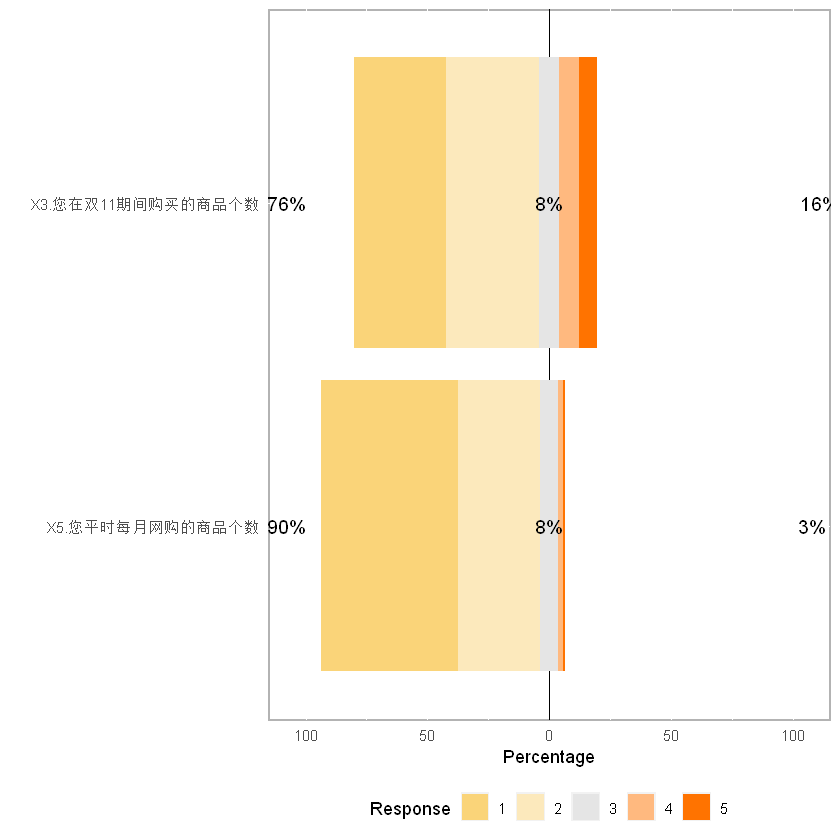

In [45]:
library(likert)
l<-likert(df_xc)
plot(l,type = "bar",
low.color = "#fad479",
    high.color = "#ff7300e7",
    text.color = "black",
    text.size = 4,
    wrap = 50)

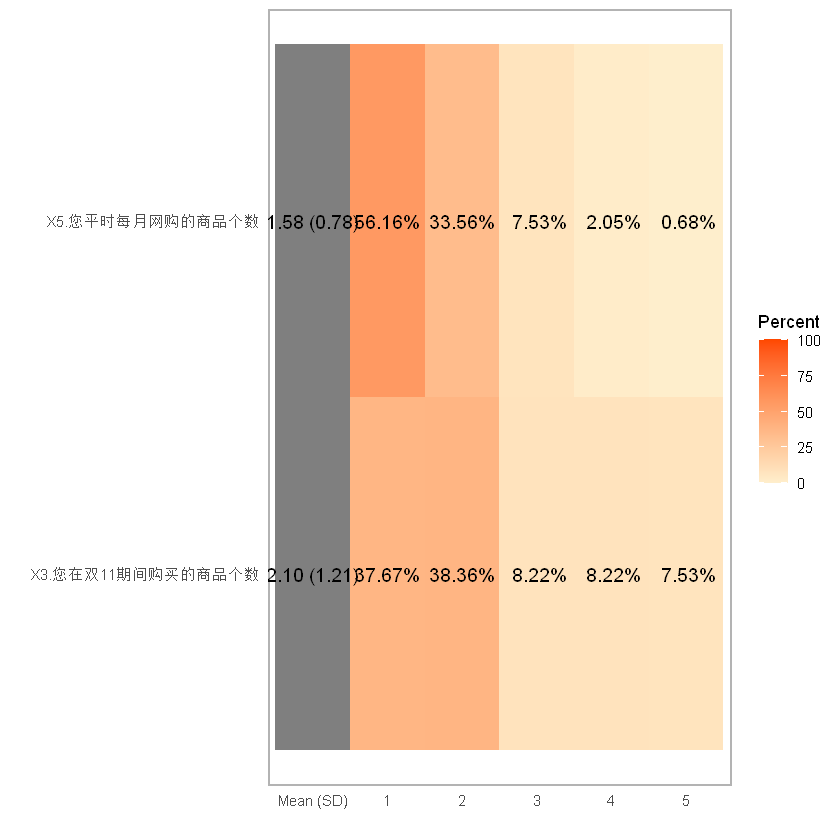

In [46]:

  plot(l,
    type = "heat",
    low.color = "#feefcd",
    high.color = "#ff4800",
    text.color = "black",
    text.size = 4,
    wrap = 50
  )


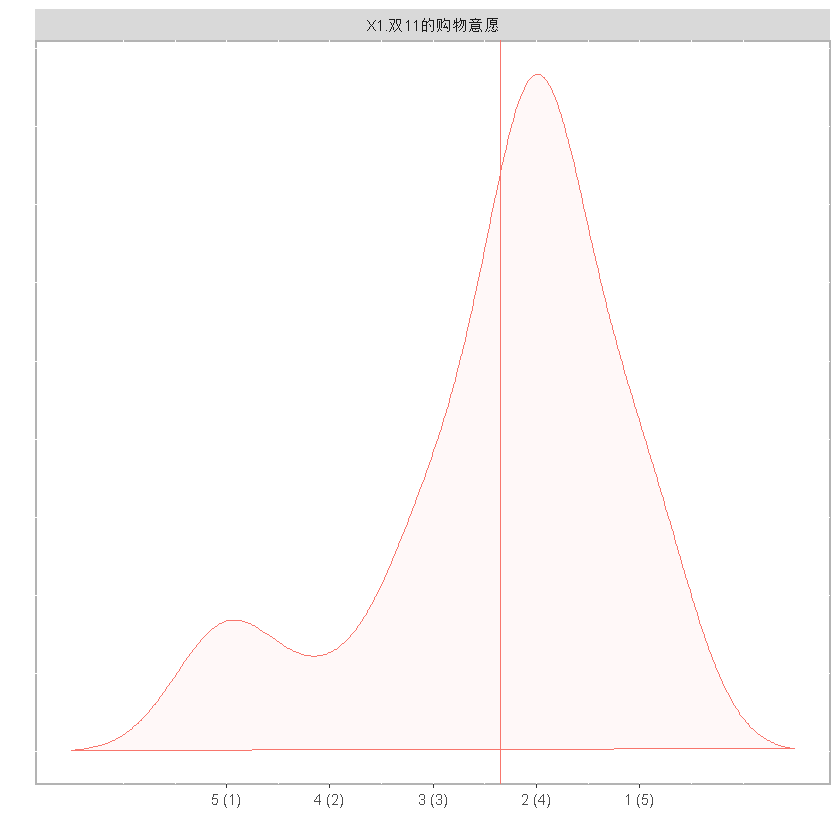

: 

In [323]:
likert(df_xc) %>%
  plot(type = "density",
       facet = TRUE,
       bw = 0.5)